##
The goal of this notebook is to efficiently handle and analyze CSV datasets related to car sales.
This includes loading multiple CSV files, understanding and managing data types, handling missing values, 
detecting and treating outliers, and preparing the data for analysis.
The project also focuses on performing Exploratory Data Analysis (EDA) to uncover patterns and trends, 
followed by creating meaningful visualizations to clearly communicate insights from the data.

In [ ]:
import pandas as pd
df_2023 = pd.read_csv("K:/Data Science Internship/WEEK 2/CSV_data/car_sales_2023.csv", index_col=0)
df_2024 = pd.read_csv("K:/Data Science Internship/WEEK 2/CSV_data/car_sales_2024.csv", index_col=0)
df_2025 = pd.read_csv("K:/Data Science Internship/WEEK 2/CSV_data/car_sales_2025.csv", index_col=0)

df = pd.concat([df_2023, df_2024 ,df_2025])


In [3]:
df = df.sort_values("date").reset_index(drop=True)
df.head()

,date,car_model,brand,units_sold,price,total_sales
0,2023-01-01,Creta,Hyundai,25.0,1200000.0,30000000.0
1,2023-01-02,Harrier,Tata,7.0,1700000.0,11900000.0
2,2023-01-02,XUV700,Mahindra,900.0,2000000.0,12000000.0
3,2023-01-06,Sonet,Kia,24.0,900000.0,21600000.0
4,2023-01-08,Venue,Hyundai,21.0,950000.0,19950000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         500 non-null    object 
 1   car_model    500 non-null    object 
 2   brand        500 non-null    object 
 3   units_sold   483 non-null    float64
 4   price        473 non-null    float64
 5   total_sales  458 non-null    float64
dtypes: float64(3), object(3)
memory usage: 23.6+ KB


In [5]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         500 non-null    datetime64[ns]
 1   car_model    500 non-null    object        
 2   brand        500 non-null    object        
 3   units_sold   483 non-null    float64       
 4   price        473 non-null    float64       
 5   total_sales  458 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 23.6+ KB


In [7]:
df.isnull().sum()

date            0
car_model       0
brand           0
units_sold     17
price          27
total_sales    42
dtype: int64

In [8]:
df['year']=df["date"].dt.year
df['month'] = df['date'].dt.month

import numpy as np

df["units_sold"] = df.groupby(["year", "car_model"])["units_sold"] \
                     .transform(lambda x: x.fillna(np.floor(x.mean())))
df["price"] = df.groupby(["year", "car_model"])["price"]\
                 .transform(lambda x: x.fillna(x.mean()))



In [9]:
df.isnull().sum()

date            0
car_model       0
brand           0
units_sold      0
price           0
total_sales    42
year            0
month           0
dtype: int64

In [10]:
df["total_sales"] = df["total_sales"].fillna(df["units_sold"] * df["price"])

In [11]:
df.isnull().sum()

date           0
car_model      0
brand          0
units_sold     0
price          0
total_sales    0
year           0
month          0
dtype: int64

In [12]:
from scipy import stats

z_scores = stats.zscore(df["units_sold"])
outliers = df[(z_scores < -3) | (z_scores > 3)]  

print(f"Number of outliers in units_sold using Z-score : {outliers.shape[0]}")
print(outliers)

z_scores = stats.zscore(df["total_sales"])
outliers1 = df[(z_scores < -3) | (z_scores > 3)]  

print(f"Number of outliers in units_sold using Z-score : {outliers1.shape[0]}")
print(outliers1)

Number of outliers in units_sold using Z-score : 2
          date car_model     brand  units_sold      price   total_sales  year  \
2   2023-01-02    XUV700  Mahindra       900.0  2000000.0  1.200000e+07  2023   
321 2025-01-25    Safari      Tata      1000.0  1800000.0  1.800000e+09  2025   

     month  
2        1  
321      1  
Number of outliers in units_sold using Z-score : 1
          date car_model brand  units_sold      price   total_sales  year  \
321 2025-01-25    Safari  Tata      1000.0  1800000.0  1.800000e+09  2025   

     month  
321      1  


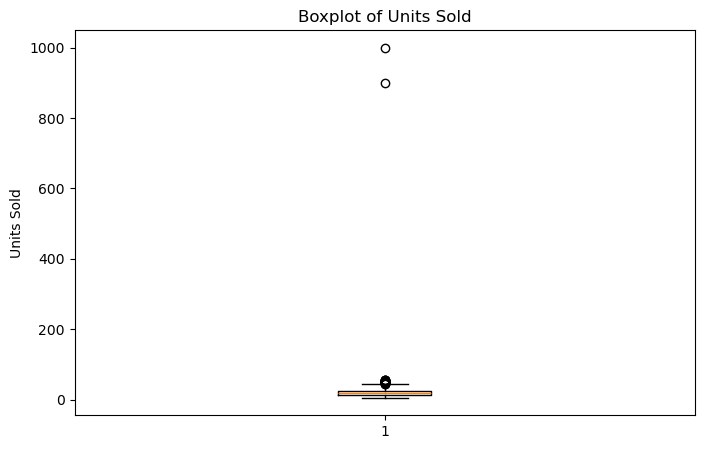

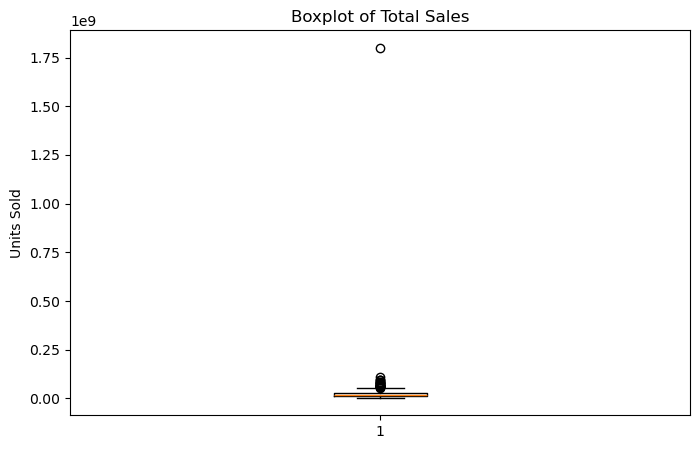

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df["units_sold"])
plt.title("Boxplot of Units Sold")
plt.ylabel("Units Sold")
plt.show()

plt.figure(figsize=(8,5))
plt.boxplot(df["total_sales"])
plt.title("Boxplot of Total Sales")
plt.ylabel("Units Sold")
plt.show()



In [14]:

#Here i have detected outliers in units sold . Now i am going to handle them using bounds . Here i will be taking 50 as the max units sold without these outliers is 44 .
df['units_sold'] = df['units_sold'].clip(lower=0, upper=50)

In [15]:
print("Maximum units sold:", df["units_sold"].max())

Maximum units sold: 50.0


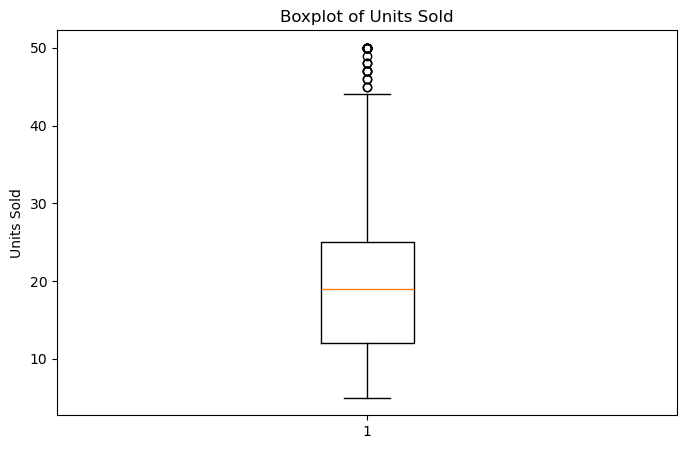

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df["units_sold"])
plt.title("Boxplot of Units Sold")
plt.ylabel("Units Sold")
plt.show()


In [17]:
corelation_matrix = df[["units_sold","price","total_sales"]].corr()
print(corelation_matrix)
df.head()

             units_sold     price  total_sales
units_sold     1.000000  0.005385     0.276588
price          0.005385  1.000000     0.165231
total_sales    0.276588  0.165231     1.000000


,date,car_model,brand,units_sold,price,total_sales,year,month
0,2023-01-01,Creta,Hyundai,25.0,1200000.0,30000000.0,2023,1
1,2023-01-02,Harrier,Tata,7.0,1700000.0,11900000.0,2023,1
2,2023-01-02,XUV700,Mahindra,50.0,2000000.0,12000000.0,2023,1
3,2023-01-06,Sonet,Kia,24.0,900000.0,21600000.0,2023,1
4,2023-01-08,Venue,Hyundai,21.0,950000.0,19950000.0,2023,1


In [18]:
group1 = df.groupby("brand")["price"].agg(["mean", "min", "max", "count"])
print(group1)

                  mean        min        max  count
brand                                              
Honda     9.706897e+05   800000.0  1100000.0     58
Hyundai   1.082278e+06   950000.0  1200000.0     79
Kia       1.069355e+06   900000.0  1250000.0     62
Mahindra  1.760417e+06  1500000.0  2000000.0     48
Maruti    7.398810e+05   650000.0   850000.0     84
Skoda     1.329310e+06  1300000.0  1350000.0     58
Tata      1.290991e+06   600000.0  1800000.0    111


In [19]:
df.to_csv("Cleaned_car_sales.csv")



In [20]:

grouped = df.groupby("brand").agg({
    "price": lambda x: np.floor(x.mean()),
    "units_sold": "sum",
    "total_sales": "sum",
})


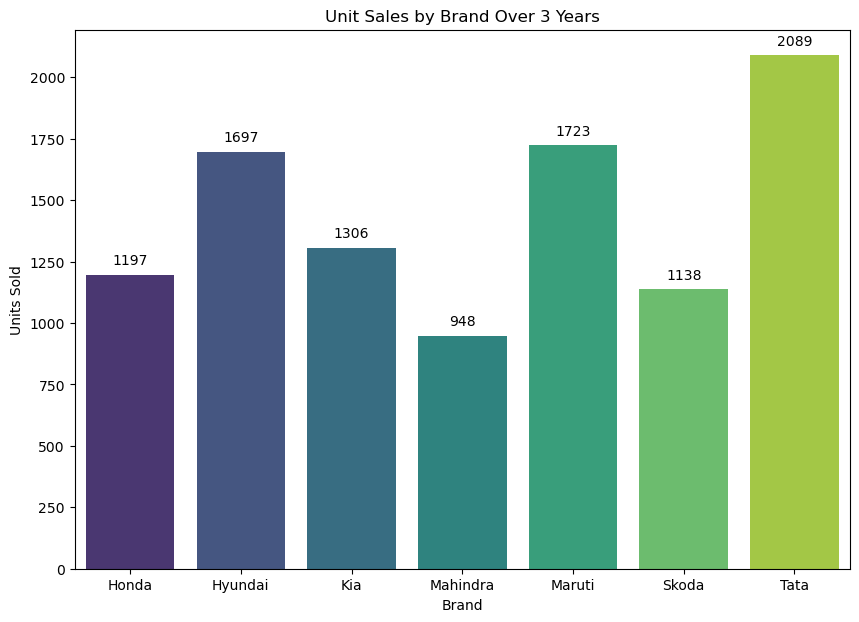

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 7))
ax = sns.barplot(
        x=grouped.index,
        y=grouped["units_sold"],
        hue=grouped.index,  
        palette="viridis",
        legend=False
)

plt.title("Unit Sales by Brand Over 3 Years")
plt.xlabel("Brand")
plt.ylabel("Units Sold")
for container in ax.containers:
    ax.bar_label(container,padding=5)
plt.show()



In [22]:
modelandmake = df.groupby(["car_model", "brand"])["units_sold"].sum()
print(modelandmake)


car_model  brand   
Amaze      Honda       543.0
Baleno     Maruti      610.0
Brezza     Maruti      650.0
City       Honda       654.0
Creta      Hyundai     589.0
Harrier    Tata        445.0
Kushaq     Skoda       467.0
Nexon      Tata        405.0
Punch      Tata        448.0
Safari     Tata        791.0
Seltos     Kia         545.0
Slavia     Skoda       671.0
Sonet      Kia         761.0
Swift      Maruti      463.0
Thar       Mahindra    408.0
Venue      Hyundai     507.0
Verna      Hyundai     601.0
XUV700     Mahindra    540.0
Name: units_sold, dtype: float64


In [23]:
tata_brand = modelandmake.xs("Tata", level="brand") 
print(tata_brand)

car_model
Harrier    445.0
Nexon      405.0
Punch      448.0
Safari     791.0
Name: units_sold, dtype: float64


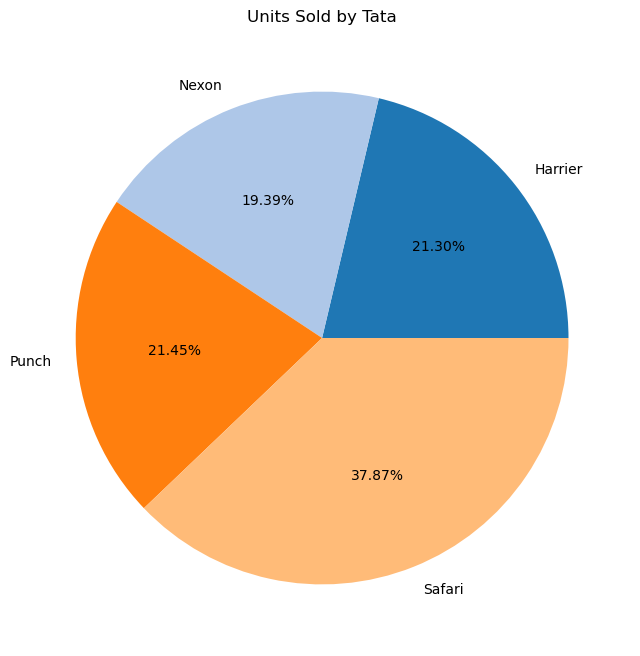

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(
    tata_brand, 
    labels=tata_brand.index,
    autopct="%1.2f%%",          
    colors=plt.cm.tab20.colors 
)
plt.title("Units Sold by Tata")
plt.show()


In [25]:
grouped_ = df.groupby("brand")["total_sales"].sum()
plot_df = grouped.reset_index()  



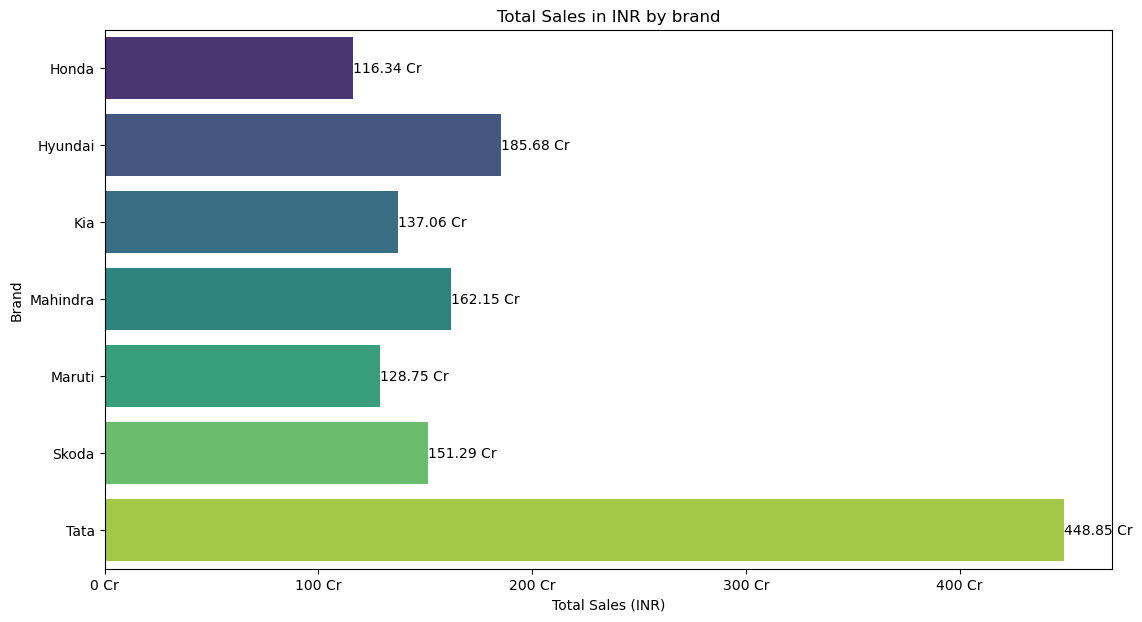

In [26]:
plt.figure(figsize=(13, 7))
bx = sns.barplot(
    x="total_sales",
    y="brand",
    data=plot_df,
    hue=grouped.index,
    palette="viridis"
    
)

plt.title("Total Sales in INR by brand")
plt.xlabel("Total Sales (INR)")
plt.ylabel("Brand")

bx.xaxis.set_major_formatter((lambda x, _: f"{x/1e7:.0f} Cr"))
for container in bx.containers:
    bx.bar_label(container, labels= [f"{v/1e7:.2f} Cr" for v in container.datavalues] )


plt.show()


In [27]:
grouped_1 = df.groupby(["brand","car_model","units_sold"])["price"].sum()
print(grouped_1)
grouped_1.info()

brand  car_model  units_sold
Honda  Amaze      7.0           2400000.0
                  8.0            800000.0
                  11.0          1600000.0
                  12.0          1600000.0
                  14.0           800000.0
                                  ...    
Tata   Safari     38.0          1800000.0
                  39.0          1800000.0
                  45.0          3600000.0
                  48.0          1800000.0
                  50.0          5400000.0
Name: price, Length: 332, dtype: float64
<class 'pandas.core.series.Series'>
MultiIndex: 332 entries, ('Honda', 'Amaze', 7.0) to ('Tata', 'Safari', 50.0)
Series name: price
Non-Null Count  Dtype  
--------------  -----  
332 non-null    float64
dtypes: float64(1)
memory usage: 4.3+ KB


In [28]:
numeric_df = df[["price", "units_sold", "total_sales"]]
numeric_df.head()


,price,units_sold,total_sales
0,1200000.0,25.0,30000000.0
1,1700000.0,7.0,11900000.0
2,2000000.0,50.0,12000000.0
3,900000.0,24.0,21600000.0
4,950000.0,21.0,19950000.0


In [29]:
corr_matrix = numeric_df.corr()
print(corr_matrix)

                price  units_sold  total_sales
price        1.000000    0.005385     0.165231
units_sold   0.005385    1.000000     0.276588
total_sales  0.165231    0.276588     1.000000


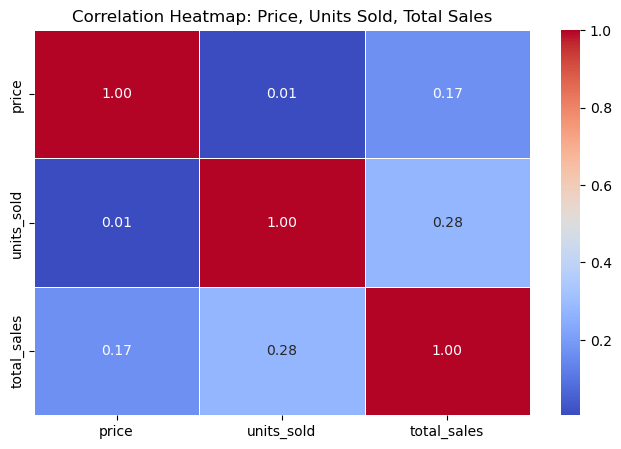

In [30]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    corr_matrix, 
    annot=True,        
    cmap="coolwarm",    
    fmt=".2f",         
    linewidths=0.5
)
plt.title("Correlation Heatmap: Price, Units Sold, Total Sales")
plt.show()

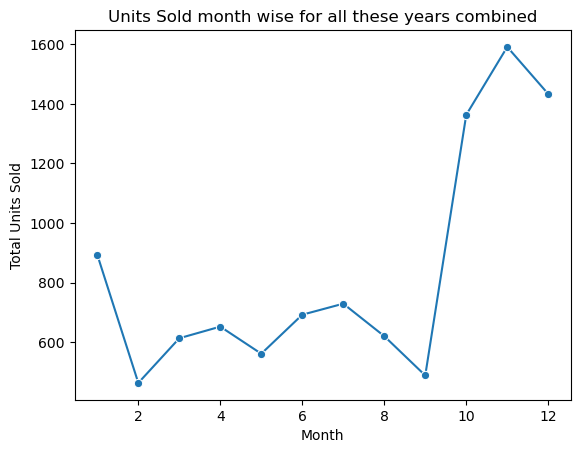

In [31]:

monthly_sales = df.groupby("month")["units_sold"].sum().reset_index()


sns.lineplot(
    x="month",
    y="units_sold",
    data=monthly_sales,
    marker="o"
)

plt.title("Units Sold month wise for all these years combined")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.show()
